## Projeto de Análise de atraso de Vôos


In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pd.options.display.float_format = '{:.0f}'.format


In [2]:
flights = pd.read_csv("flights.csv")

flights.head()


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003,1955,2211,2225,WN,...,4,8,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754,735,1002,1000,WN,...,5,10,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628,620,804,750,WN,...,3,17,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829,1755,1959,1925,WN,...,3,10,0,N,0,2,0,0,0,32
4,5,2008,1,3,4,1940,1915,2121,2110,WN,...,4,10,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.tail()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1936753,7009710,2008,12,13,6,1250,1220,1617,1552,DL,...,9,18,0,N,0,3,0,0,0,22
1936754,7009717,2008,12,13,6,657,600,904,749,DL,...,15,34,0,N,0,0,57,18,0,0
1936755,7009718,2008,12,13,6,1007,847,1149,1010,DL,...,8,32,0,N,0,1,0,19,0,79
1936756,7009726,2008,12,13,6,1251,1240,1446,1437,DL,...,13,13,0,N,0,NaN,NaN,NaN,NaN,NaN
1936757,7009727,2008,12,13,6,1110,1103,1413,1418,DL,...,8,11,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [5]:
flights.shape

(1936758, 30)

### Identificando os tipos de variáveis para otimizar as consultas na análise de dados

In [6]:
from dtype_diet import report_on_dataframe

report_on_dataframe(flights)

,Current dtype,Proposed dtype,Current Memory (MB),Proposed Memory (MB),Ram Usage Improvement (MB),Ram Usage Improvement (%)
Column,,,,,,
Unnamed: 0,int64,int32,7566,3783,3783,50
Year,int64,int16,7566,1891,5674,75
Month,int64,int8,7566,946,6620,87
DayofMonth,int64,int8,7566,946,6620,87
DayOfWeek,int64,int8,7566,946,6620,87
DepTime,float64,float32,7566,3783,3783,50
CRSDepTime,int64,int16,7566,1891,5674,75
ArrTime,float64,float32,7566,3783,3783,50
CRSArrTime,int64,int16,7566,1891,5674,75


### Otimizando automaticamente as variáveis com o *optimize_dtypes*

In [7]:
# Importando a biblioteca
from dtype_diet import optimize_dtypes

# Salvando os tipos 
otimizando_df = report_on_dataframe(flights, unit="MB")

flights_optimizes = optimize_dtypes(flights, otimizando_df)

#Analisando a diferença no consumo de memória
print(f'Dataset Original: {flights.memory_usage(deep=True).sum()/1024/1024} MB')
print(f'Dataset Modificado: {flights_optimizes.memory_usage(deep=True).sum()/1024/1024} MB')


Dataset Original: 923.5110082626343 MB
Dataset Modificado: 116.86437797546387 MB


In [8]:
flights_optimizes.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

### Organizando o Dataset

In [9]:
# Removendo colunas desnecessárias
flights_optimizes = flights_optimizes.drop("Unnamed: 0", 1)

C:\Users\NandoDevs\AppData\Local\Temp\ipykernel_2956\3290708108.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  flights_optimizes = flights_optimizes.drop("Unnamed: 0", 1)


C:\Users\NandoDevs\AppData\Local\Temp\ipykernel_2956\763486603.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = flights_optimizes.corr()


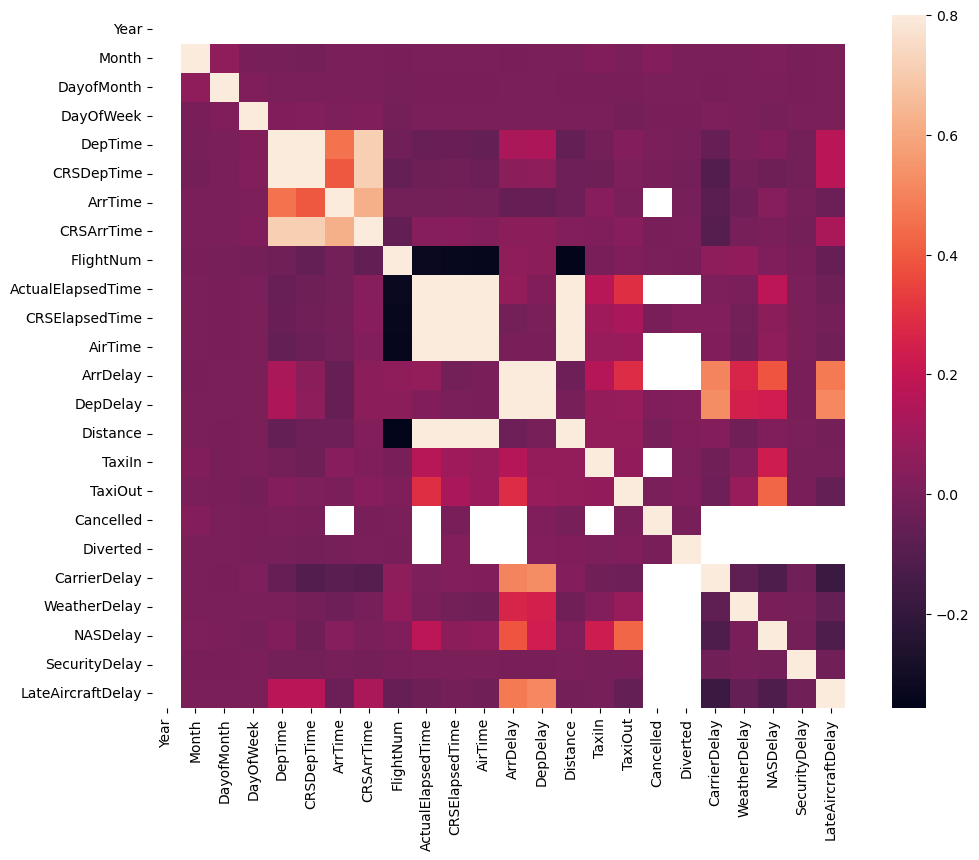

In [10]:
# Correlação entre colunas
#correlation matrix
corrmat = flights_optimizes.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#### O atraso na chegada do voo é a soma de CarrierDelay, WeatherDelay, NASDelay e LateAircraftDelay. Nos casos de cancelamento ou desvio não há correlação com as causas do atraso.

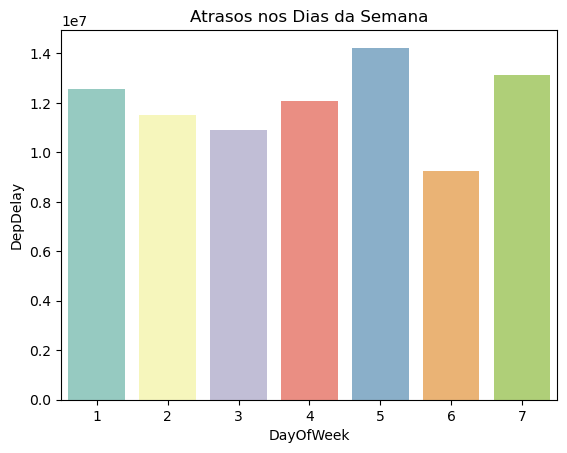

In [11]:
day_delay = flights_optimizes[['DayOfWeek', 'DepDelay']]
#type(date_delay)
day_delay = day_delay.groupby(by='DayOfWeek').sum()
day_delay=day_delay.reset_index(drop=False)
day_delay.head(7)
plt.title("Atrasos nos Dias da Semana")
sns.barplot(x="DayOfWeek", y="DepDelay", data=day_delay, palette="Set3");
plt.show()

#### Análise:
Sexta-feira é o dia da semana com maior atraso e sábado é o dia com menor tempo.

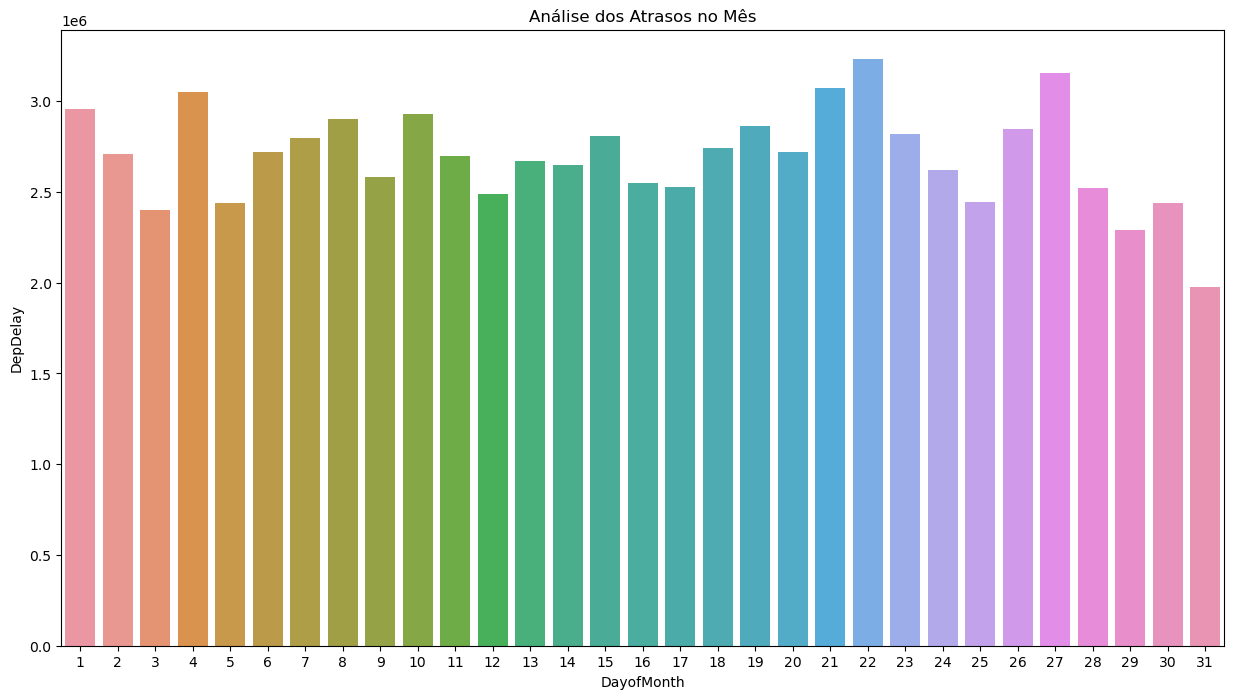

In [12]:
daym_delay = flights_optimizes[['DayofMonth', 'DepDelay']]
daym_delay = daym_delay.groupby(by='DayofMonth').sum()
daym_delay=daym_delay.reset_index(drop=False)
daym_delay.head(7)
plt.figure(figsize=(15,8));
plt.title("Análise dos Atrasos no Mês")
sns.barplot(x="DayofMonth", y="DepDelay", data=daym_delay);
plt.show()

#### Na segunda quinzena do mês, observa-se o maior nível de tempo de atraso dos voos, não podemos interpretar como o dia 31 do mês é o que tem menos atrasos, já que nem todos os meses têm 31 dias.

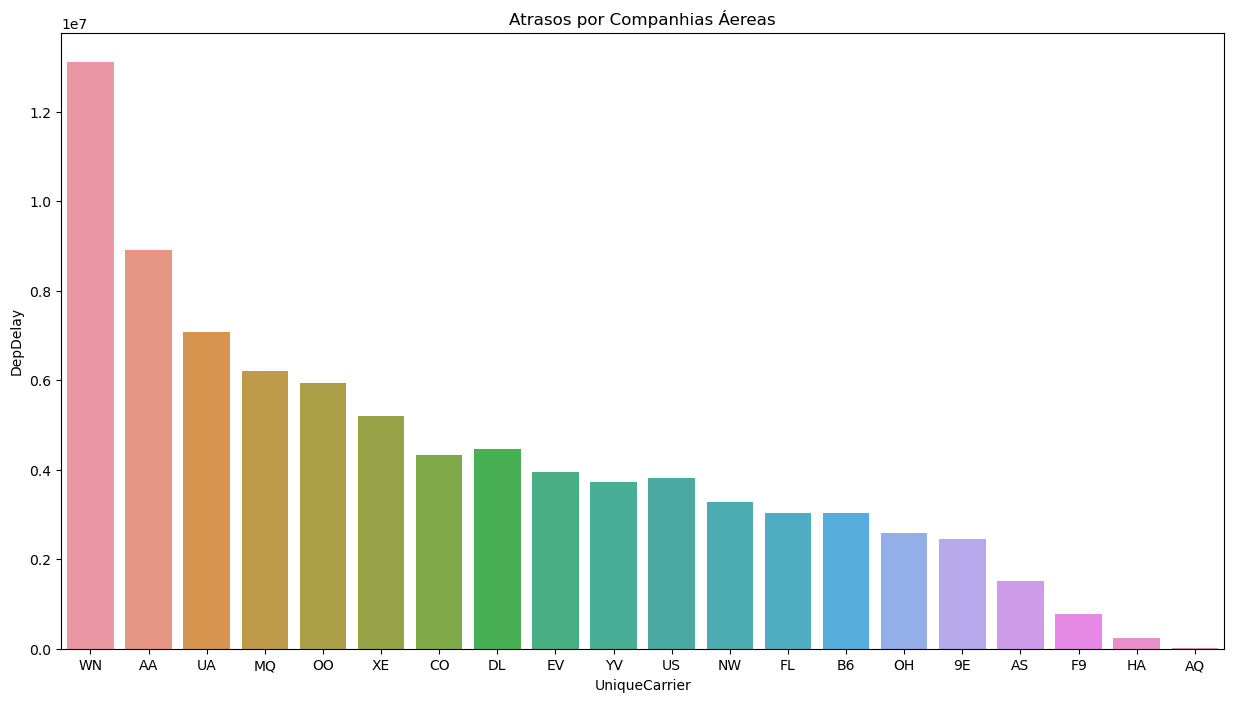

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [13]:

Aerol_delay = flights_optimizes[['UniqueCarrier', 'DepDelay']]
Aerol_delay = Aerol_delay.groupby(by='UniqueCarrier').sum()
Aerol_delay=Aerol_delay.reset_index(drop=False)
Aerol_delay.head(7)
plt.figure(figsize=(15,8))
sns.barplot(x="UniqueCarrier", y="DepDelay", data=Aerol_delay,order=['WN', 'AA', 'UA', 'MQ','OO','XE','CO','DL','EV','YV',
                                                                                'US', 'NW','FL', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ']);
plt.title("Atrasos por Companhias Áereas")
plt.show()
print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

In [14]:
flights_cancelled = flights_optimizes.loc[flights_optimizes['Cancelled'] == 1]
flights_cancelled.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1542406,2008,10,27,1,1622,1420,NaN,1520,WN,27,...,NaN,19,1,A,0,NaN,NaN,NaN,NaN,NaN
1546593,2008,10,25,6,1323,1255,NaN,1442,XE,2347,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
1547161,2008,10,22,3,1825,1815,NaN,1927,XE,2819,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
1547178,2008,10,22,3,1733,1715,NaN,1818,XE,2890,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
1548271,2008,10,15,3,1943,1745,NaN,1857,XE,2117,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
